In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

In [3]:
class K_Means:
    def __init__(self, k=3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):
        self.centroids = {}
        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            flag = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    flag = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if flag:
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
df = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df = df.apply(lambda x: pd.factorize(x)[0])
dataset = df.astype(float).values.tolist()


In [25]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0,0,0
1,0,1,0,1
2,1,2,1,2
3,1,3,1,3
4,1,4,2,4
...,...,...,...,...
195,1,6,61,13
196,1,18,62,31
197,0,39,62,65
198,0,39,63,83


In [26]:
X = df.values #returns a numpy array

km = K_Means(5)
km.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]


C:\Users\naveen\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
C:\Users\naveen\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide


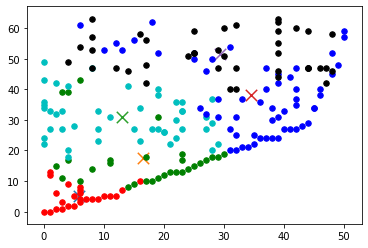

In [27]:
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][1], km.centroids[centroid][2], s = 130, marker = "x")
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[1], features[2], color = color,s = 30)
plt.show()


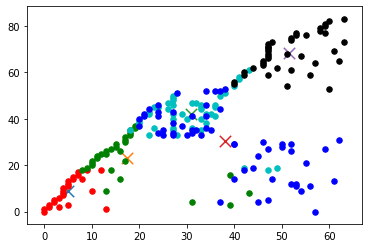

In [28]:
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s = 130, marker = "x")
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[2], features[3], color = color,s = 30)
plt.show()


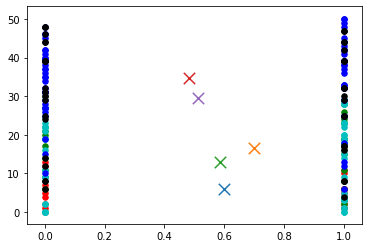

In [29]:
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[0], features[1], color = color,s = 30)
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rd

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


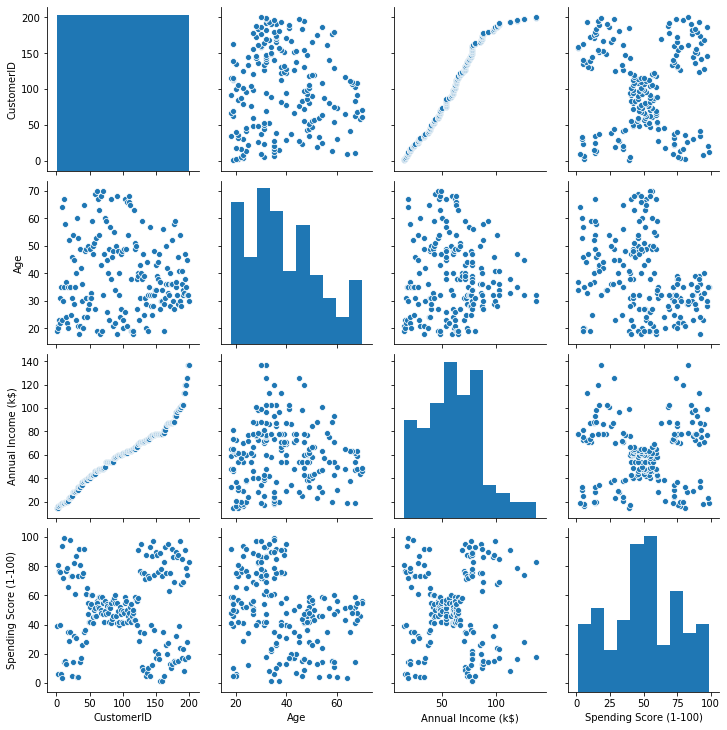

In [29]:
sns.pairplot(df)

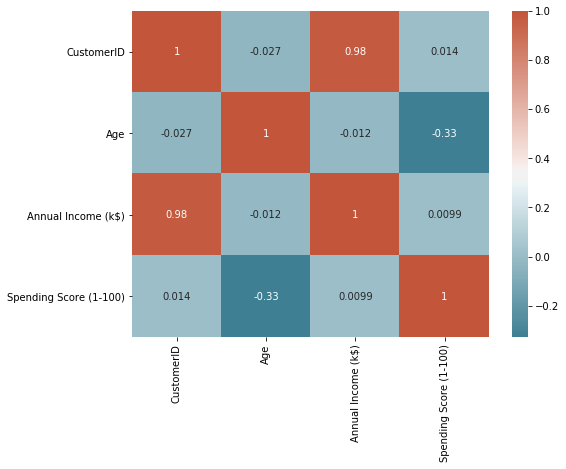

In [22]:
corr = df.corr()# plot the heatmap
plt.subplots(figsize=(8,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [13]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
X = df.iloc[:, [3, 4]].values

In [15]:
m=X.shape[0]
n=X.shape[1]

In [16]:
K=5 # number of clusters
Output = {}

In [17]:
Centroids=np.array([]).reshape(n,0)

In [18]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

Centroids

array([[ 33., 101.,  85.,  44.,  20.],
       [ 81.,  24.,  26.,  50.,  15.]])

In [26]:
for i in range(100):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y
    

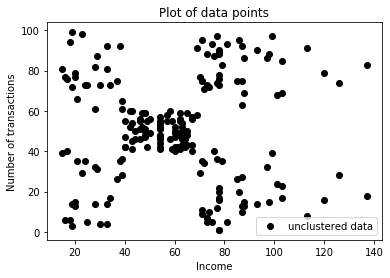

In [27]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

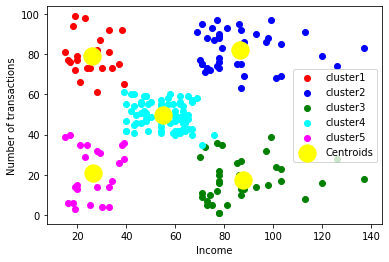

In [28]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

In [24]:
# WCSS_array=np.array([])
# for K in range(1,11):
#     kmeans=Kmeans(X,K)
#     kmeans.fit(n_iter)
#     Output,Centroids=kmeans.predict()
#     wcss=0
#     for k in range(K):
#         wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
#     WCSS_array=np.append(WCSS_array,wcss)
# print(Output)

In [57]:
print(Centroids)

[[25.72727273 26.30434783 55.2962963  86.53846154 88.2       ]
 [79.36363636 20.91304348 49.51851852 82.12820513 17.11428571]]
